# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [81]:
import torch

In [82]:
torch.__version__

'1.6.0+cu101'

### 초기화 되지 않은 행렬 

In [83]:
x = torch.empty(4, 2)
print(x)

tensor([[2.0061e+15, 0.0000e+00],
        [1.6115e-43, 1.6255e-43],
        [1.3312e-43, 1.5134e-43],
        [1.5554e-43, 1.3593e-43]])


### 무작위로 초기화된 행렬

In [84]:
x = torch.rand(4,2)
print(x)

tensor([[0.0831, 0.2121],
        [0.6285, 0.7887],
        [0.7545, 0.8289],
        [0.0196, 0.7366]])


### dtype이 long, 0으로 채워진 텐서

In [85]:
x = torch.zeros(4,2, dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [86]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [87]:
x = x.new_ones(2,4,dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [88]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.2302, -0.1674, -0.1967,  1.1759],
        [-1.4953, -1.7373, -0.5123,  0.6193]])


### 텐서의 크기

In [89]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [90]:
print(x)

tensor([[-0.2302, -0.1674, -0.1967,  1.1759],
        [-1.4953, -1.7373, -0.5123,  0.6193]])


In [91]:
y = torch.rand(2,4)
print(y)
print(x + y)

tensor([[0.0128, 0.5718, 0.5404, 0.8316],
        [0.6720, 0.5659, 0.0810, 0.8760]])
tensor([[-0.2174,  0.4044,  0.3438,  2.0075],
        [-0.8233, -1.1714, -0.4312,  1.4954]])


### 덧셈2

In [92]:
print(torch.add(x,y))

tensor([[-0.2174,  0.4044,  0.3438,  2.0075],
        [-0.8233, -1.1714, -0.4312,  1.4954]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [93]:
result = torch.empty(2,4)
torch.add(x,y,out=result)
print(result)

tensor([[-0.2174,  0.4044,  0.3438,  2.0075],
        [-0.8233, -1.1714, -0.4312,  1.4954]])


### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [94]:
print(x)
print(y)
y.add_(x) # y += x
print(y)
y.add_(x) # y += x
print(y)

tensor([[-0.2302, -0.1674, -0.1967,  1.1759],
        [-1.4953, -1.7373, -0.5123,  0.6193]])
tensor([[0.0128, 0.5718, 0.5404, 0.8316],
        [0.6720, 0.5659, 0.0810, 0.8760]])
tensor([[-0.2174,  0.4044,  0.3438,  2.0075],
        [-0.8233, -1.1714, -0.4312,  1.4954]])
tensor([[-0.4476,  0.2370,  0.1471,  3.1835],
        [-2.3186, -2.9087, -0.9435,  2.1147]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [95]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x-y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [96]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x*y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [97]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(x/y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [98]:
x = torch.Tensor([[1,3],
                  [5,7]])
y = torch.Tensor([[2,4],
                  [6,8]])
print(torch.mm(x,y))

tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [99]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [100]:
print(x[:,1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [101]:
x = torch.randn(4,5)
y = x.view(20)
z = x.view(5,-1) #-1 자동

print(x.size())
print(y.size())
print(z.size())

torch.Size([4, 5])
torch.Size([20])
torch.Size([5, 4])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [102]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.2757])
-0.27570921182632446
torch.float32


- 스칼라값 하나만 존재해야함

In [103]:
'''
x = torch.randn(2)
print(x)
print(x.item())
print(x.dtype)
'''

'\nx = torch.randn(2)\nprint(x)\nprint(x.item())\nprint(x.dtype)\n'

### squeeze 
- 차원을 축소(제거)

In [104]:
tensor = torch.rand(1,3,3)
tensor.shape

torch.Size([1, 3, 3])

In [105]:
t = tensor.squeeze()

print(t)
print(t.shape)

tensor([[0.7495, 0.9045, 0.8375],
        [0.7441, 0.2510, 0.3096],
        [0.0453, 0.9771, 0.1653]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [106]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.2750, 0.5107, 0.7478],
         [0.5198, 0.7385, 0.1349],
         [0.2620, 0.0692, 0.3861]]])
torch.Size([1, 3, 3])


In [107]:
t = tensor.unsqueeze(dim=0)

print(t)
print(t.shape)

tensor([[[[0.2750, 0.5107, 0.7478],
          [0.5198, 0.7385, 0.1349],
          [0.2620, 0.0692, 0.3861]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [108]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

print(torch.stack([x,y,z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [109]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat((a,b),dim=0)
print(c)
print(c.size())

tensor([[[[ 0.2067, -1.8491, -0.5335],
          [-1.2443, -1.2709,  0.2228],
          [-0.5003, -1.0307, -0.3746]]],


        [[[ 0.9137, -0.0829, -0.4258],
          [-0.5038,  0.2852, -1.2239],
          [-0.4194, -0.4279,  0.2607]]]])
torch.Size([2, 1, 3, 3])


In [110]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat((a,b),dim=1)
print(c)
print(c.size())

tensor([[[[ 0.1323, -0.4814, -0.1179],
          [ 1.0143, -0.5647,  0.6100],
          [-0.5006, -0.2071, -0.7643]],

         [[ 1.5294, -0.3898, -0.2200],
          [ 1.9357, -0.2821, -0.0602],
          [ 0.1833, -2.1839, -0.7122]]]])
torch.Size([1, 2, 3, 3])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [111]:
tensor = torch.rand(3,6)
t1,t2,t3 = torch.chunk(tensor,3, dim=1) #몇개로 나눌것인가
print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.1266, 0.1070, 0.4305, 0.1617, 0.2964, 0.6946],
        [0.6751, 0.9184, 0.1841, 0.7335, 0.9524, 0.9104],
        [0.2279, 0.8890, 0.3906, 0.7602, 0.8199, 0.5745]])
tensor([[0.1266, 0.1070],
        [0.6751, 0.9184],
        [0.2279, 0.8890]])
tensor([[0.4305, 0.1617],
        [0.1841, 0.7335],
        [0.3906, 0.7602]])
tensor([[0.2964, 0.6946],
        [0.9524, 0.9104],
        [0.8199, 0.5745]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [112]:
tensor = torch.rand(3,6)
t1,t2 = torch.split(tensor,3, dim=1) #크기가 몇인가
print(tensor)
print(t1)
print(t2)

tensor([[0.0623, 0.0543, 0.5498, 0.1945, 0.7178, 0.8373],
        [0.4128, 0.8590, 0.2771, 0.5383, 0.4987, 0.0164],
        [0.1876, 0.6861, 0.1379, 0.5597, 0.7216, 0.5517]])
tensor([[0.0623, 0.0543, 0.5498],
        [0.4128, 0.8590, 0.2771],
        [0.1876, 0.6861, 0.1379]])
tensor([[0.1945, 0.7178, 0.8373],
        [0.5383, 0.4987, 0.0164],
        [0.5597, 0.7216, 0.5517]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [113]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [114]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [115]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [116]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [117]:
import torch

In [118]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.4623])
0.4622940421104431
torch.float32


In [119]:
device = torch.device('cuda' if  torch.cuda.is_available() else 'cpu')
y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y
print(device)
print(z)
print(z.to('cpu', torch.double))

cuda
tensor([1.4623], device='cuda:0')
tensor([1.4623], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [120]:
import torch

In [121]:
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [122]:
y = x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [123]:
print(y.grad_fn)

In [124]:
z = y * y * 2
out = z.mean()

print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [125]:
a = torch.randn(3,3)
a = ((a*3)/ (a-1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a*a).sum()
print(b.grad_fn)

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [126]:
out.backward()

In [127]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [128]:
x = torch.randn(3, requires_grad=True)
y=x*2
while y.data.norm() < 1000:
  y = y * 2

print(y)

tensor([-1137.7249,   776.4738,  -158.0403], grad_fn=<MulBackward0>)


In [129]:
v = torch.tensor([0.1,1.0,0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [130]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [131]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [132]:
import torch

In [133]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [134]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [135]:
print('a.data:',a.data)
print('a.grad:',a.grad)
print('a.grad_fn:',a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: None
a.grad_fn: None


- $b = a + 2$

In [136]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [137]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [138]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [139]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [140]:
print('a.data:',a.data)
print('a.grad:',a.grad)
print('a.grad_fn:',a.grad_fn)

a.data: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


In [141]:
print('b.data:',b.data)
print('b.grad:',b.grad)
print('b.grad_fn:',b.grad_fn)

b.data: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad_fn: <AddBackward0 object at 0x7f494ce87ef0>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [142]:
print('c.data:',c.data)
print('c.grad:',c.grad)
print('c.grad_fn:',c.grad_fn)

c.data: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn: <PowBackward0 object at 0x7f494ce87f98>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [143]:
print('out.data:',out.data)
print('out.grad:',out.grad)
print('out.grad_fn:',out.grad_fn)

out.data: tensor(36.)
out.grad: None
out.grad_fn: <SumBackward0 object at 0x7f494ce87fd0>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [144]:
x = torch.ones(3, requires_grad=True)
y = (x**2)
z = y ** 2
out = z.sum()
print(out)

tensor(3., grad_fn=<SumBackward0>)


In [145]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [146]:
print('x.data:',x.data)
print('x.grad:',x.grad)
print('x.grad_fn:',x.grad_fn)

x.data: tensor([1., 1., 1.])
x.grad: tensor([  0.4000,   4.0000, 400.0000])
x.grad_fn: None


In [147]:
print('y.data:',y.data)
print('y.grad:',y.grad)
print('y.grad_fn:',y.grad_fn)

y.data: tensor([1., 1., 1.])
y.grad: None
y.grad_fn: <PowBackward0 object at 0x7f494ce873c8>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


In [148]:
print('z.data:',z.data)
print('z.grad:',z.grad)
print('z.grad_fn:',z.grad_fn)

z.data: tensor([1., 1., 1.])
z.grad: None
z.grad_fn: <PowBackward0 object at 0x7f494ce873c8>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [149]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [150]:
m = nn.Conv2d(16, 33,3, stride=2)

m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2))

m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2), dilation=(3,1))#sparse하게 동작

input = torch.randn(20,16,50,100)
print(input)
output = m(input)
print(output)

tensor([[[[-1.4162e+00,  4.9961e-02,  1.1230e-02,  ...,  2.6443e-01,
           -1.3560e+00, -1.5501e-01],
          [ 2.5019e-01,  2.5618e+00, -7.0001e-01,  ..., -6.1764e-01,
            2.2036e+00, -1.0823e+00],
          [ 1.4296e-03,  9.6252e-01,  1.4438e-01,  ...,  2.0331e-01,
           -6.6671e-01, -4.3844e-01],
          ...,
          [ 5.7132e-01, -7.8693e-01,  1.3437e+00,  ...,  1.3412e+00,
           -1.0296e+00,  1.6042e+00],
          [-1.0589e+00, -4.5279e-01, -5.6436e-01,  ...,  5.8659e-02,
            9.5880e-01, -1.0740e+00],
          [-2.0468e-01,  1.3371e+00, -9.0179e-01,  ..., -1.0126e+00,
            9.0002e-02, -2.1182e+00]],

         [[-2.4801e+00, -8.9021e-01, -6.6888e-01,  ..., -8.1214e-01,
            6.4691e-01,  3.3171e-01],
          [ 1.1081e-01, -7.8748e-02, -1.5863e+00,  ...,  2.0361e+00,
            2.3417e-01,  1.1042e+00],
          [ 5.4476e-01, -7.5931e-01,  1.4574e+00,  ..., -2.5215e-01,
           -9.4614e-01,  4.3216e-02],
          ...,
     

In [151]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [152]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [153]:
filters = torch.randn(8,4,3,3) # 3 3 크기 컬러 이미지 8개 -> 필터는 32개

In [154]:
inputs = torch.randn(1,4,5,5) # 5 * 5크기 컬러 이미지 1개
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

#컨볼루션 레이어에 들어가면 채널: rgb, 1
#컨볼루션 레이어는 1개짜리 8채널 5 * 5 크기 보통 두번째는 3이나 1임

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [155]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [156]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5,),std=(0.5,))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [157]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [158]:
trainset = torchvision.datasets.MNIST(root='/content/',
                                      train=True,
                                      download=True,
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='/content/',
                                      train=False,
                                      download=True,
                                      transform=transform)


In [159]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [160]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [161]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [162]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [165]:
image = torch_image.numpy()
image.shape

(28, 28)

In [166]:
label = labels[0].numpy()
label.shape

()

In [167]:
label

array(7)

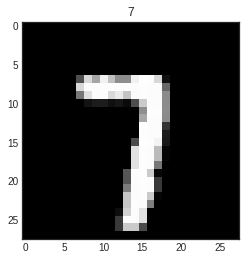

In [170]:
plt.title(label)
plt.imshow(image,'gray')
plt.show()

## 각 Layer 설명

In [171]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [172]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [173]:
layer = nn.Conv2d(1, 20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [174]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [175]:
weight = weight.detach()

In [176]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

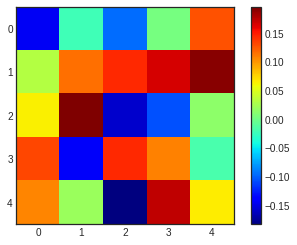

In [177]:
plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show()

In [178]:
print(image.shape)

(28, 28)


In [179]:
input_image = torch.unsqueeze(images[0], dim=0)

In [180]:
output_data = layer(input_image)

In [181]:
output = output_data.data

In [182]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

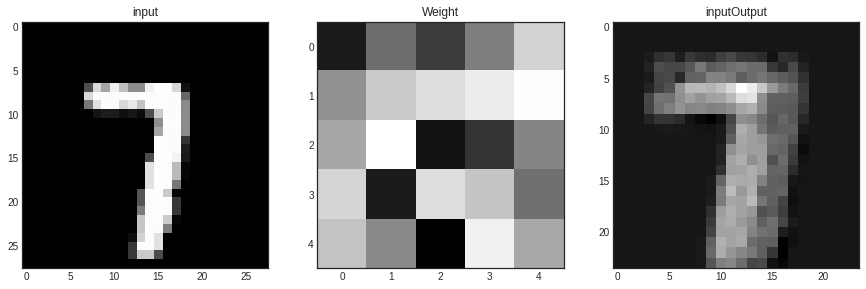

In [187]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title('input')
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'gray')
plt.subplot(133)
plt.title('inputOutput')
plt.imshow(output_arr[0,0,:,:], 'gray')
plt.show()

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [188]:
image.shape

(28, 28)

In [189]:
pool = F.max_pool2d(output,2,2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [190]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

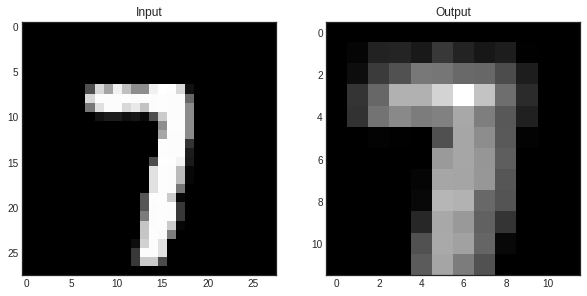

In [191]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.title('Input')
plt.imshow(image, 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:], 'gray')
plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [192]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [193]:
flatten = image.view(1, 28*28)
flatten.shape

torch.Size([1, 784])

In [194]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [195]:
lin

tensor([[-0.8608,  0.5366,  0.7836,  0.5987, -1.0049, -0.2541, -0.4300,  0.5440,
          0.1533,  0.1255]], grad_fn=<AddmmBackward>)

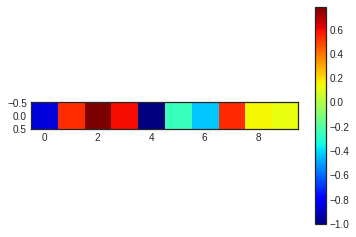

In [196]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Softmax

In [197]:
with torch.no_grad():
  flatten = image.view(1,28*28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

In [198]:
softmax

tensor([[0.1389, 0.0747, 0.1319, 0.0281, 0.0653, 0.0702, 0.1521, 0.0629, 0.1741,
         0.1018]])

In [199]:
np.sum(softmax.numpy())

1.0

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [200]:
inputs = torch.randn(4,3,28,28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [201]:
layer = nn.Conv2d(3,20,5,1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

